<a href="https://colab.research.google.com/github/Dollyp1205/Marketing-Research-Methods---Dolly-Poddar--Jio-Institute/blob/Group-Assignment/Question5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


,product_id,product category,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sport leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,babies,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


,purchase_count,avg_price
count,32951.000000,32951.000000
mean,3.418713,145.302464
std,10.619709,246.895756
min,1.000000,0.850000
25%,1.000000,39.900000
50%,1.000000,79.000000
75%,3.000000,154.900000
max,527.000000,6735.000000


Correlation between Product Price and Purchase Count: -0.032139862680945167


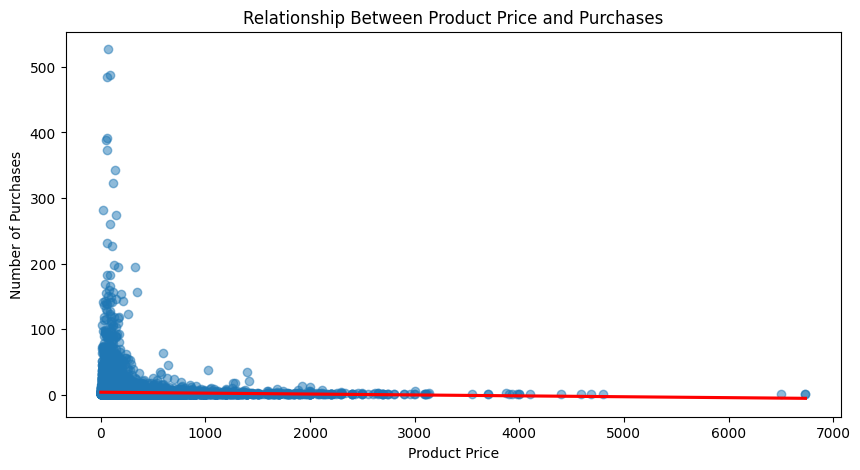

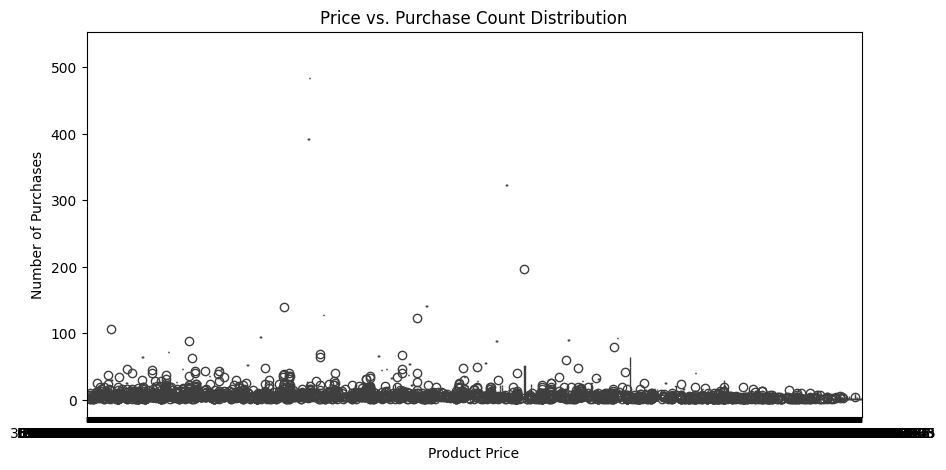

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
order_items = pd.read_csv('/content/order_items.csv')
products = pd.read_csv('/content/products.csv')
orders = pd.read_csv('/content/orders (1).csv')

# Display first few rows of each dataset
display(order_items.head())
display(products.head())
display(orders.head())

# Merge order_items with products to get product details
df = order_items.merge(products, on='product_id', how='left')

# Group by product and calculate total purchases and average price
product_summary = df.groupby('product_id').agg(
    purchase_count=('order_id', 'count'),  # Number of times product was purchased
    avg_price=('price', 'mean')  # Average price of product
).reset_index()

# Summary statistics
display(product_summary.describe())

# Correlation analysis
correlation = product_summary['avg_price'].corr(product_summary['purchase_count'])
print(f'Correlation between Product Price and Purchase Count: {correlation}')

# Scatter plot with regression line
plt.figure(figsize=(10, 5))
sns.regplot(x=product_summary['avg_price'], y=product_summary['purchase_count'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Product Price')
plt.ylabel('Number of Purchases')
plt.title('Relationship Between Product Price and Purchases')
plt.show()

# Boxplot to check distribution
plt.figure(figsize=(10, 5))
sns.boxplot(data=product_summary, x='avg_price', y='purchase_count')
plt.xlabel('Product Price')
plt.ylabel('Number of Purchases')
plt.title('Price vs. Purchase Count Distribution')
plt.show()
